# Multivariate Data and the Grammar of Graphics

## Palmer Penguins

In [1]:
# load data
# Data URL: https://datasci112.stanford.edu/data/penguins.csv

import pandas as pd
df = pd.read_csv('data/penguins.csv')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


## Review

1. relationships between two categorical variables

In [2]:
df[['species', 'island']].value_counts()

species    island   
Gentoo     Biscoe       124
Chinstrap  Dream         68
Adelie     Dream         56
           Torgersen     52
           Biscoe        44
Name: count, dtype: int64

In [3]:
df[['species', 'island']].value_counts().unstack().fillna(0)

island,Biscoe,Dream,Torgersen
species,,,
Adelie,44.0,56.0,52.0
Chinstrap,0.0,68.0,0.0
Gentoo,124.0,0.0,0.0


2. relationships between categorical and quantitative variables

In [4]:
df.groupby('species')[['bill_length_mm', 'bill_depth_mm']].mean()

,bill_length_mm,bill_depth_mm
species,,
Adelie,38.791391,18.346358
Chinstrap,48.833824,18.420588
Gentoo,47.504878,14.982114


## Visualizing the Relationship

The relationship between two quantitative variables can be visualized using a **scatterplot.**

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

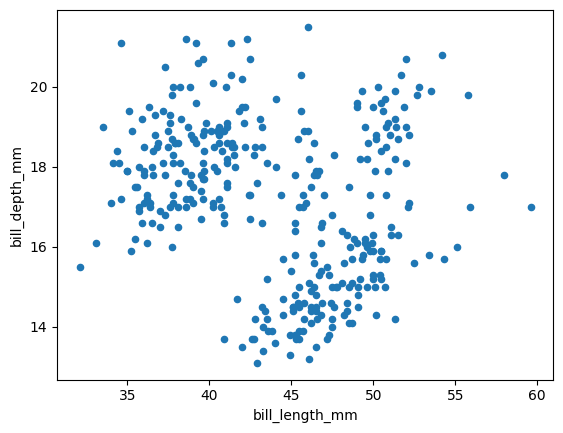

In [5]:
df.plot.scatter(x='bill_length_mm', y='bill_depth_mm')

The relationship between two quantitative variables $\mathrm{x}$ and $\mathrm{y}$ can be summarized using the **correlation coefficient** $r$.

$$
r = \frac{\sum_{i=1}^{n} \frac{x_i - \mathrm{\bar{x}}}{\mathrm{sd(x)}} \cdot \frac{y_i - \mathrm{\bar{y}}}{\mathrm{sd(y)}}}{n-1}
$$

In [6]:
# Manually calclulate the Pearson correlation coefficient between bill length and bill depth

x = df['bill_length_mm']
y = df['bill_depth_mm']
# Count the number of non-missing values in both x and y
n = (~x.isnull() & ~y.isnull()).sum()
# Calculate the Pearson correlation coefficient
(((x - x.mean()) / x.std()) * ((y - y.mean()) / y.std())).sum() / (n - 1)

np.float64(-0.2350528703555327)

## Correlation Coefficient

- A positive correlation means that as $\mathrm{x}$ increases, $\mathrm{y}$ tends to increase also.
- A negative correlation means that as $\mathrm{x}$ increases, $\mathrm{y}$ tends to decrease.
- The correlation coefficient $r$ is always between $\mathrm{-1}$ and $\mathrm{1}$.
- The closer the correlation coefficient is to $\pm 1$, the stronger the relationship.

Since the correlation coefficient between bill length and bill depth is -0.235, bills that are longer tend to be less deep.


In [7]:
# Calculate the Pearson correlation coefficient using built-in functions
# Get the correlation matrix for bill length and bill depth
df[['bill_length_mm', 'bill_depth_mm']].corr()

,bill_length_mm,bill_depth_mm
bill_length_mm,1.000000,-0.235053
bill_depth_mm,-0.235053,1.000000


## Beyond Two Variables

But wait! There were also different penguin species.
How do we incorporate another variable into our analysis?

## Multivariate Data

> _"The word is complex, dynamic, multidimensional; the paper is static, flat. How are we to represent the rich visual world of experience and measurement on mere flatland?"_
>
> _"Escaping this flatland is the essential task of envisioning information - for all interesting worlds (physical, biological, imaginary, human) that we seek to understand are inevitably and happily multivariate in nature."_
>
><div style="text-align: right"> – Edward Tufte, <em>Envisioning Information</em></div>

## Map of Napoleon's Russia Campaign

The French civil engineer Charles Joseph Minard (1781–1870) made the following visualization of Napoleon’s Russia campaign of 1812.

Tufte calls this the "best statistical graphic ever drawn."

[Wikipedia](https://en.wikipedia.org/wiki/Charles_Joseph_Minard)

[Link](https://ageofrevolution.org/200-object/flow-map-of-napoleons-invasion-of-russia/)

## Aesthetic Mappings

from the map of Napoleon's Russia campaign:

- x: longitude
- y: latitude
- width: size of army
- color: direction of army
- y (line graph): temperature
- x / text (line graph): date

## Grammar of Graphics

The **grammar of graphics** says that every plot can be described by just a few components:
- aesthetic mappings
- geometric objects (e.g., points, lines, bars)
- ...and a few other things.

The ideal library generates a plot from a specification of the aesthetic mappings and the geometric object.

## Plotly

Let's create a scatterplot where we map:

- x --> bill length
- y --> bill depth
- color --> species

As a bonus, all of the plots that Plotly makes are interactive! Try hovering your cursor over a point or selecting a region of the scatterplot.

In [8]:
import plotly.express as px
px.scatter(df, x='bill_length_mm', y='bill_depth_mm', color='species')

What is the correlation between bill length and bill depth, conditional on species?

In [9]:
df.groupby('species')[['bill_length_mm', 'bill_depth_mm']].corr()

bill_length_mm  bill_depth_mm
species                                                
Adelie    bill_length_mm        1.000000       0.391492
          bill_depth_mm         0.391492       1.000000
Chinstrap bill_length_mm        1.000000       0.653536
          bill_depth_mm         0.653536       1.000000
Gentoo    bill_length_mm        1.000000       0.643384
          bill_depth_mm         0.643384       1.000000

We can make facets using `facet_row=` or `facet_col=`.
For example, if we wanted to represent species using columns (instead of color), then we would do the following:

In [10]:
px.scatter(df, x='bill_length_mm', y='bill_depth_mm', facet_col='species')

You can have both row and column facets.

In [11]:
px.scatter(df, x='bill_length_mm', y='bill_depth_mm', facet_col='species', facet_row='island')